In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d'
run_name = 'sarsa_easy6'
source_dir = '../data/'+system_name+'/'+run_name+'/'
data_dir = '../data/'+system_name+'/'+run_name+'_eval/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate the 3d kite

In [2]:
# READING THE ENVIRONMENTAL PARAMETERS
env_params = ut.read_params(source_dir+'param_env.txt')
print(env_params)

{'int_steps': 0.001, 'ep_length': 100.0, 'decision_time': 1.0, 'init_theta': 0.7853981633974483, 'init_dtheta': 0.0, 'init_phi': 0.0, 'init_dphi': 0.0, 'alphas': array([ 8., 12., 14., 16., 18., 20.]), 'CL_alphas': array([0.75, 0.9 , 1.  , 1.08, 1.1 , 1.05]), 'CD_alphas': array([0.07, 0.1 , 0.13, 0.18, 0.18, 0.21]), 'init_alpha': 5.0, 'banks': array([-0.06981317, -0.03490659, -0.01745329,  0.        ,  0.01745329,
        0.03490659,  0.06981317]), 'init_bank': 3.0, 'wind_type': 'const', 'v_wind_x': 15.0, 'v_wind_y': 0.0, 'v_wind_z': 0.0}


In [3]:
# WRITING THE EVALUATION PARAMETERS
params = dict()
params['alg_type'] = 'eval'
params['policy_path'] = source_dir+'/best_policy.txt'
params['ev_time'] = 100 # sec
params['n_steps'] = params['ev_time']/float(env_params['decision_time'])+1
params['traj_points'] = params['n_steps']
params['gamma'] = 1
ut.write_params(params, data_dir, 'param_alg.txt')

#env_params['ep_length'] = params['ev_time']-1
ut.write_params(env_params, data_dir, 'param_env.txt')

In [4]:
p = subprocess.Popen(["./run.exe", system_name, run_name+'_eval'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.stderr.read().decode('utf-8'))

In [5]:
f = open(data_dir + "ev_states.txt", "r")
st_traj = []
st_labels = f.readline().split()
for line in f.readlines():
    st_traj.append(line.split())
st_traj = np.array(st_traj, dtype='float')
#st_traj = np.loadtxt(data_dir + system_name + '/' + run_name + "/ev_states.txt", dtype='float')

traj_x=st_traj[:,0]
traj_y=st_traj[:,1]
traj_z=st_traj[:,2]

In [6]:
xs = np.linspace(0, params['ev_time'], num=len(st_traj[:,0]))

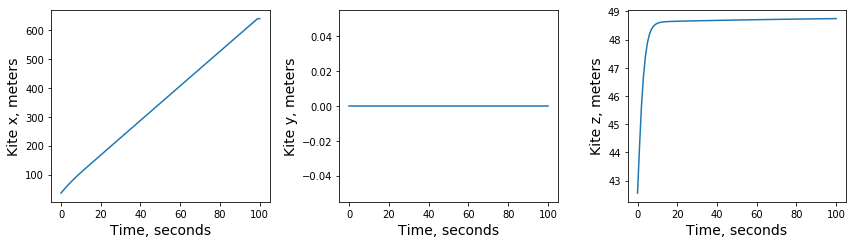

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(xs, traj_x)

ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(xs, traj_y)

ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(xs, traj_z)

plt.tight_layout()
plt.savefig(plot_dir+"eval_traj.png", dpi=200)